In [3]:
!pip install kaggle==1.5.12

In [4]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

craigslist-carstrucks-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip craigslist-carstrucks-data.zip

Archive:  craigslist-carstrucks-data.zip
replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## **Exploratory Data Analysis**



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [7]:
df= pd.read_csv('vehicles.csv')

In [8]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [10]:
df.isnull().sum()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


## Visualizations

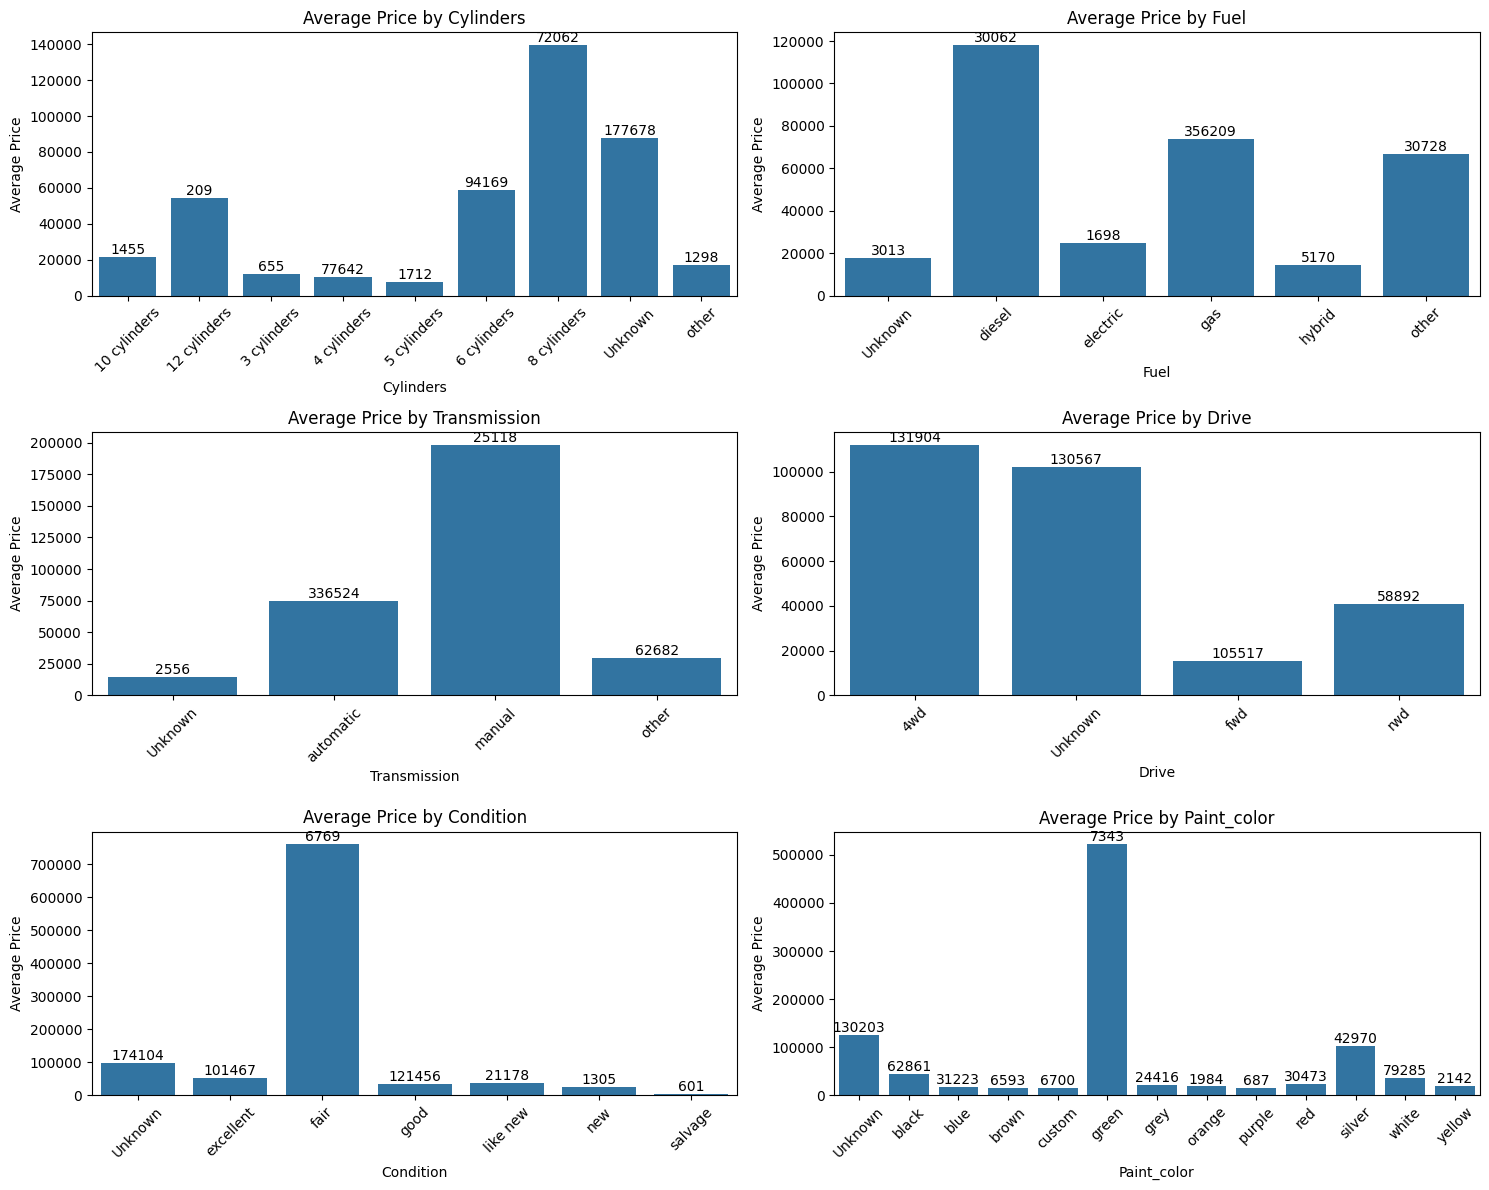

In [11]:
# Cell 1: Bar Charts with Counts and NaNs

# List of features to create bar charts for
features_to_plot_bar = ['cylinders', 'fuel', 'transmission', 'drive', 'condition', 'paint_color']

# Create subplots for each bar chart
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12)) # Adjust grid for 5 plots
axes = axes.flatten()  # Flatten the array of axes

for i, feature in enumerate(features_to_plot_bar):
    # Create a temporary column with NaNs filled for plotting purposes
    df[f'{feature}_filled'] = df[feature].fillna('Unknown')

    # Calculate count of each category
    counts = df[f'{feature}_filled'].value_counts().sort_index()

    # Calculate the average price for each category
    avg_price = df.groupby(f'{feature}_filled')['price'].mean().reindex(counts.index) # Reindex to match count order

    # Create the bar plot
    sns.barplot(x=avg_price.index, y=avg_price.values, ax=axes[i])

    # Add count labels on top of bars
    for j, p in enumerate(axes[i].patches):
        axes[i].annotate(f'{counts.iloc[j]}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points')


    # Set titles and labels
    axes[i].set_title(f'Average Price by {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels

    # Drop the temporary column
    df.drop(columns=[f'{feature}_filled'], inplace=True)


# Hide any unused subplots if there are fewer plots than subplots
if len(features_to_plot_bar) < len(axes):
    for i in range(len(features_to_plot_bar), len(axes)):
        fig.delaxes(axes[i])


plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Display the plots

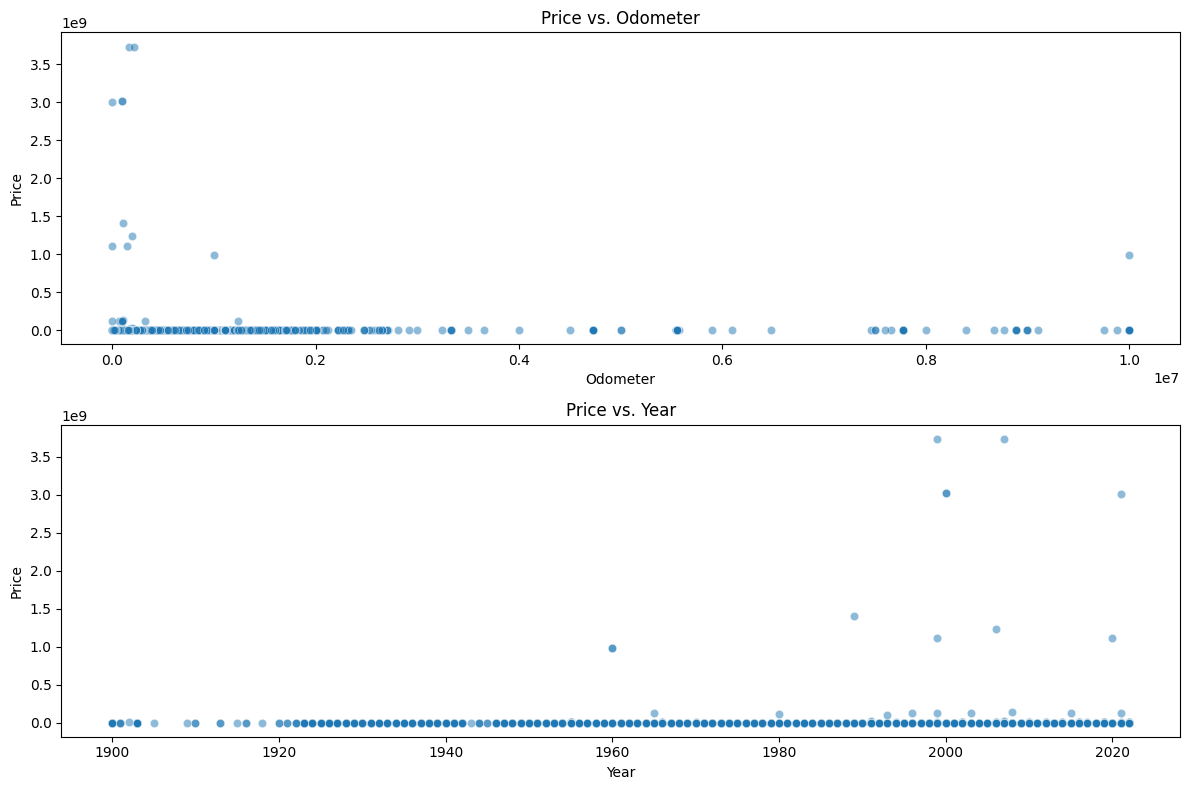

In [12]:
# Cell 2: Scatter Plots

# Features for scatter plots
features_to_plot_scatter = ['odometer', 'year'] # Use 'year' or 'age' depending on your DataFrame

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8)) # Adjust grid for 2 plots
axes = axes.flatten() # Flatten the array of axes
max_price_limit = 150000

for i, feature in enumerate(features_to_plot_scatter):
    # Create the scatter plot
    sns.scatterplot(x=df[feature], y=df['price'], ax=axes[i], alpha=0.5) # alpha for transparency

    # Set titles and labels
    axes[i].set_title(f'Price vs. {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Price')

     # Set the y-axis limit
    # axes[i].set_ylim(0, max_price_limit)
    # axes[i].set_yscale('log')
    # axes[i].set_xscale('log')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Display the plots

## Deal with missing values and One Hot Encoding

In [13]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [14]:
# drop the following columns:
# url, region_url, image_url, description, condition, size, county, lat, long
df_1= df.drop(['url', 'region_url', 'image_url', 'description', 'condition', 'size', 'county', 'lat', 'long', 'model', 'id', 'region', 'paint_color'], axis=1)
df_1.head()

,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,state,posting_date
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


In [15]:
# create a column isVIN to replace VIN column with either isVIN=1 for VIN available and isVIN=0 for Vin= NaN
df_1['isVIN'] = df_1['VIN'].apply(lambda x: 1 if pd.notnull(x) else 0)
df_1.drop('VIN', axis=1, inplace=True)
df_1.head()

,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,state,posting_date,isVIN
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,0
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,0
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,0
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,0
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,0


In [16]:
#replace odometer nulls with median
df_1['odometer'].fillna(df_1['odometer'].median(), inplace=True)
df_1['odometer'].value_counts(dropna=False)
df_1.head()

/tmp/ipython-input-16-766963064.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['odometer'].fillna(df_1['odometer'].median(), inplace=True)


,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,state,posting_date,isVIN
0,6000,NaN,NaN,NaN,NaN,85548.0,NaN,NaN,NaN,NaN,az,NaN,0
1,11900,NaN,NaN,NaN,NaN,85548.0,NaN,NaN,NaN,NaN,ar,NaN,0
2,21000,NaN,NaN,NaN,NaN,85548.0,NaN,NaN,NaN,NaN,fl,NaN,0
3,1500,NaN,NaN,NaN,NaN,85548.0,NaN,NaN,NaN,NaN,ma,NaN,0
4,4900,NaN,NaN,NaN,NaN,85548.0,NaN,NaN,NaN,NaN,nc,NaN,0


In [17]:
# Replace missing values with 'Unknown'
df_1['manufacturer'].fillna('Unknown', inplace=True)
#df_1['model'].fillna('Unknown', inplace=True)
# df_1['paint_color'].fillna('Unknown', inplace=True)
df_1['cylinders'].fillna('Unknown', inplace=True)
df_1['fuel'].fillna('Unknown', inplace=True)
df_1['title_status'].fillna('Unknown', inplace=True)
df_1['transmission'].fillna('Unknown', inplace=True)
df_1['type'].fillna('Unknown', inplace=True)
df_1['drive'].fillna('Unknown', inplace=True)
df_1.head()

/tmp/ipython-input-17-1209590549.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['manufacturer'].fillna('Unknown', inplace=True)
/tmp/ipython-input-17-1209590549.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,state,posting_date,isVIN
0,6000,NaN,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,Unknown,Unknown,az,NaN,0
1,11900,NaN,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,Unknown,Unknown,ar,NaN,0
2,21000,NaN,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,Unknown,Unknown,fl,NaN,0
3,1500,NaN,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,Unknown,Unknown,ma,NaN,0
4,4900,NaN,Unknown,Unknown,Unknown,85548.0,Unknown,Unknown,Unknown,Unknown,nc,NaN,0


In [18]:
#drop rows where posting date is nan
df_1.dropna(subset=['posting_date'], inplace=True)
df_1.dropna(subset=['year'], inplace=True)
print(len(df_1))
df_1.head()

425675


,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,type,state,posting_date,isVIN
27,33590,2014.0,gmc,8 cylinders,gas,57923.0,clean,other,Unknown,pickup,al,2021-05-04T12:31:18-0500,1
28,22590,2010.0,chevrolet,8 cylinders,gas,71229.0,clean,other,Unknown,pickup,al,2021-05-04T12:31:08-0500,1
29,39590,2020.0,chevrolet,8 cylinders,gas,19160.0,clean,other,Unknown,pickup,al,2021-05-04T12:31:25-0500,1
30,30990,2017.0,toyota,8 cylinders,gas,41124.0,clean,other,Unknown,pickup,al,2021-05-04T10:41:31-0500,1
31,15000,2013.0,ford,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,al,2021-05-03T14:02:03-0500,0


In [19]:
# display the avg price for each each unique value of 'cylinder' column in descending order
df_1['cylinders'].replace('other', 'Unknown', inplace=True)
df_1.groupby('cylinders')['price'].mean().sort_values(ascending=False)
#pd.set_option('display.max_rows', None)

/tmp/ipython-input-19-3660660603.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['cylinders'].replace('other', 'Unknown', inplace=True)


,price
cylinders,
8 cylinders,139935.829442
Unknown,87373.405156
6 cylinders,58773.709808
12 cylinders,54299.382775
10 cylinders,21300.320442
3 cylinders,12297.344136
4 cylinders,10490.869070
5 cylinders,7842.779790


In [20]:
# replace 'other' in fuel column with 'Unknown'
df_1['fuel'].replace('other', 'Unknown', inplace=True)
df_1['fuel'].unique()
df_1.groupby('fuel')['price'].mean().sort_values(ascending=False)

/tmp/ipython-input-20-4252942673.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['fuel'].replace('other', 'Unknown', inplace=True)


,price
fuel,
diesel,118399.318542
gas,73989.607975
Unknown,62685.473522
electric,24630.695575
hybrid,14565.792836


In [21]:
# for the columns 'fuel', 'cylinder', 'manufacturer', do one hot encoding with an appropriate prefix for column names and binary values (0 or 1)

df_2 = pd.get_dummies(df_1, columns=['fuel', 'cylinders', 'manufacturer'], prefix=['fuel', 'cylinders', 'manufacturer'])
print("Num rows: ", len(df_2))
df_2.head()

Num rows:  425675


,price,year,odometer,title_status,transmission,drive,type,state,posting_date,isVIN,...,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
27,33590,2014.0,57923.0,clean,other,Unknown,pickup,al,2021-05-04T12:31:18-0500,1,...,False,False,False,False,False,False,False,False,False,False
28,22590,2010.0,71229.0,clean,other,Unknown,pickup,al,2021-05-04T12:31:08-0500,1,...,False,False,False,False,False,False,False,False,False,False
29,39590,2020.0,19160.0,clean,other,Unknown,pickup,al,2021-05-04T12:31:25-0500,1,...,False,False,False,False,False,False,False,False,False,False
30,30990,2017.0,41124.0,clean,other,Unknown,pickup,al,2021-05-04T10:41:31-0500,1,...,False,False,False,False,False,False,False,True,False,False
31,15000,2013.0,128000.0,clean,automatic,rwd,truck,al,2021-05-03T14:02:03-0500,0,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# average for each distinct 'type'
df_2.groupby('type')['price'].mean().sort_values(ascending=False)

,price
type,
Unknown,204985.742746
pickup,145559.578464
SUV,34450.938063
truck,29383.577993
other,24743.587517
coupe,21919.163391
convertible,19982.749029
van,17179.710536
sedan,15934.249885


In [23]:
# Define a dictionary to map current categories to new grouped categories
type_mapping = {
    'pickup': 'Pickup',
    'truck': 'Truck',
    'SUV': 'SUV',
    'sedan': 'Sedan',
    'hatchback': 'Hatchback',
    'coupe': 'Coupe',
    'convertible': 'Convertible',
    'wagon': 'Hatchback',
    'mini-van': 'Mini-Van',
    'van': 'Van',
    'offroad': 'Offroad',
    'bus': 'Bus',
    'other': 'Unknown',
    'Unknown': 'Unknown'  # Keep 'Unknown' as a separate category
}

# Apply the mapping to the 'type' column
df_2['type_grouped'] = df_2['type'].map(type_mapping)
df_2.drop('type', axis=1, inplace=True)

# You can check the new unique values in the grouped column
print(df_2['type_grouped'].unique())


['Pickup' 'Truck' 'Unknown' 'Coupe' 'SUV' 'Hatchback' 'Mini-Van' 'Sedan'
 'Offroad' 'Bus' 'Van' 'Convertible']


In [24]:
df_2['transmission'].replace('other', 'Unknown', inplace=True)
df_2['transmission'].unique()

/tmp/ipython-input-24-2064130629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['transmission'].replace('other', 'Unknown', inplace=True)


array(['Unknown', 'automatic', 'manual'], dtype=object)

In [25]:
# one hot encoding for 'transmission', 'drive', 'type'
df_3 = pd.get_dummies(df_2, columns=['transmission', 'drive', 'type_grouped'], prefix=['transmission', 'drive', 'type'])
#df_3.info()
df_3.head()

,price,year,odometer,title_status,state,posting_date,isVIN,fuel_Unknown,fuel_diesel,fuel_electric,...,type_Coupe,type_Hatchback,type_Mini-Van,type_Offroad,type_Pickup,type_SUV,type_Sedan,type_Truck,type_Unknown,type_Van
27,33590,2014.0,57923.0,clean,al,2021-05-04T12:31:18-0500,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
28,22590,2010.0,71229.0,clean,al,2021-05-04T12:31:08-0500,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
29,39590,2020.0,19160.0,clean,al,2021-05-04T12:31:25-0500,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
30,30990,2017.0,41124.0,clean,al,2021-05-04T10:41:31-0500,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
31,15000,2013.0,128000.0,clean,al,2021-05-03T14:02:03-0500,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [26]:
# column 'age' = 'posting_date(Year)'-year and then drop 'posting_date' and 'year' columns. 'posting_date' column is in the follwoing format: '2021-05-04T12:31:18-0500	' and 'year' column is in float64
df_3['age'] = df_3['posting_date'].str[:4].astype(int) - df_3['year'].astype(int)
df_3.drop(['posting_date', 'year'], axis=1, inplace=True)
df_3.head()

,price,odometer,title_status,state,isVIN,fuel_Unknown,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,...,type_Hatchback,type_Mini-Van,type_Offroad,type_Pickup,type_SUV,type_Sedan,type_Truck,type_Unknown,type_Van,age
27,33590,57923.0,clean,al,1,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,7
28,22590,71229.0,clean,al,1,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,11
29,39590,19160.0,clean,al,1,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,1
30,30990,41124.0,clean,al,1,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,4
31,15000,128000.0,clean,al,0,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,8


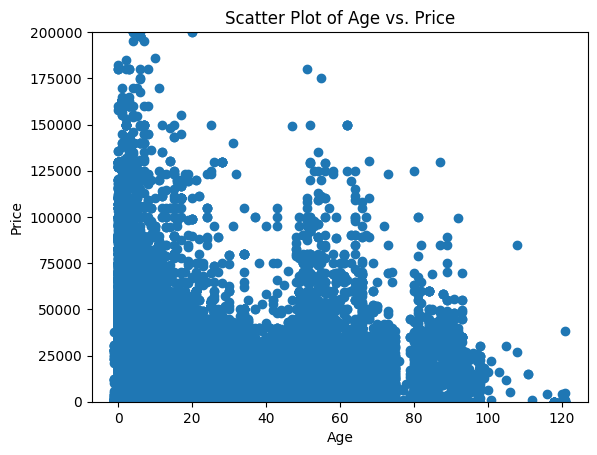

In [27]:
# scatter plot between age and price
plt.scatter(df_3['age'], df_3['price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.ylim(0, 200000)
plt.title('Scatter Plot of Age vs. Price')
plt.show()

In [28]:
min_price = df_3['price'].min()
max_price = df_3['price'].max()
median_price = df_3['price'].median()
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Median Price: {median_price}")

Minimum Price: 0
Maximum Price: 3736928711
Median Price: 13900.0


In [29]:
odometer_min = df_3['odometer'].min()
odometer_max = df_3['odometer'].max()
odometer_median = df_3['odometer'].median()
print(f"Minimum Odometer: {odometer_min}")
print(f"Maximum Odometer: {odometer_max}")
print(f"Median Odometer: {odometer_median}")

Minimum Odometer: 0.0
Maximum Odometer: 10000000.0
Median Odometer: 85548.0


In [30]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425675 entries, 27 to 426879
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   price                         425675 non-null  int64  
 1   odometer                      425675 non-null  float64
 2   title_status                  425675 non-null  object 
 3   state                         425675 non-null  object 
 4   isVIN                         425675 non-null  int64  
 5   fuel_Unknown                  425675 non-null  bool   
 6   fuel_diesel                   425675 non-null  bool   
 7   fuel_electric                 425675 non-null  bool   
 8   fuel_gas                      425675 non-null  bool   
 9   fuel_hybrid                   425675 non-null  bool   
 10  cylinders_10 cylinders        425675 non-null  bool   
 11  cylinders_12 cylinders        425675 non-null  bool   
 12  cylinders_3 cylinders         425675 non-null  b

In [31]:
df_3['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'Unknown', 'salvage', 'missing',
       'parts only'], dtype=object)

In [32]:
df_4 = pd.get_dummies(df_3, columns=['title_status', 'state'], prefix=['title_status', 'state'])
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425675 entries, 27 to 426879
Columns: 137 entries, price to state_wy
dtypes: bool(133), float64(1), int64(3)
memory usage: 70.2 MB


In [33]:
# convert all bool dtype to binaries (0,1)
# Select columns with boolean data type
bool_cols = df_4.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers (0s and 1s)
for col in bool_cols:
    df_4[col] = df_4[col].astype(int)

df_4['odometer'] = df_4['odometer'].astype(int)
# Verify the data types
print(df_4.info())
df_4.head()

<class 'pandas.core.frame.DataFrame'>
Index: 425675 entries, 27 to 426879
Columns: 137 entries, price to state_wy
dtypes: int64(137)
memory usage: 448.2 MB
None


,price,odometer,isVIN,fuel_Unknown,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,cylinders_10 cylinders,cylinders_12 cylinders,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
27,33590,57923,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,22590,71229,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,39590,19160,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,30990,41124,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,15000,128000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_4.describe()

,price,odometer,isVIN,fuel_Unknown,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,cylinders_10 cylinders,cylinders_12 cylinders,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
count,4.256750e+05,4.256750e+05,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,...,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000
mean,7.530564e+04,9.809614e+04,0.621838,0.078609,0.070305,0.003982,0.834970,0.012134,0.003402,0.000491,...,0.003059,0.025935,0.053790,0.002699,0.025207,0.005904,0.032318,0.026767,0.002467,0.001433
std,1.219951e+07,2.130324e+05,0.484929,0.269128,0.255660,0.062977,0.371208,0.109483,0.058225,0.022153,...,0.055221,0.158942,0.225603,0.051884,0.156754,0.076608,0.176844,0.161402,0.049604,0.037828
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.900000e+03,3.845350e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.390000e+04,8.554800e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.600000e+04,1.330000e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.736929e+09,1.000000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dealing With outliers

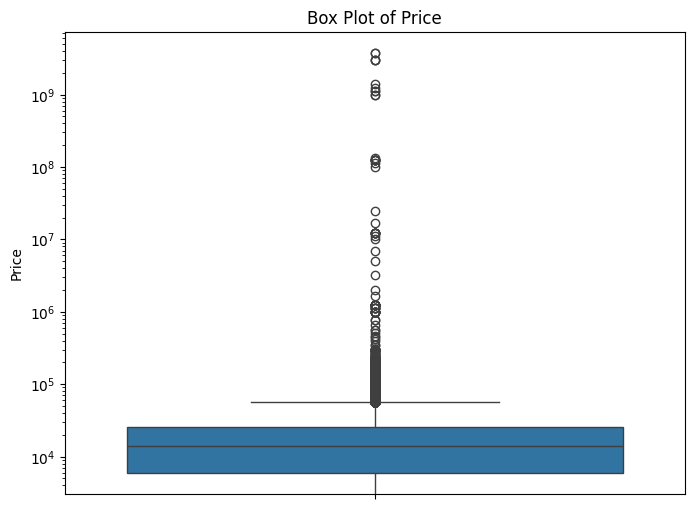

In [35]:
# Vertical Box plot to understand the distribution of price. Limit the max price to 150000
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_4['price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.yscale('log')
# plt.ylim(0, 200000)
plt.show()

In [36]:
qunatile_95 = df_4['price'].quantile(0.95)
qunatile_99 = df_4['price'].quantile(0.99)
qunatile_999 = df_4['price'].quantile(0.999)
print(f"95th percentile: {qunatile_95}")
print(f"99th percentile: {qunatile_99}")
print(f"99.9th percentile: {qunatile_999}")

95th percentile: 43998.0
99th percentile: 66882.08000000007
99.9th percentile: 120000.0


## Methods to Deal with outlier:
1. Quantile Cut-off
2. Log Transformation

# Step 1: Qunatile Cut-off

In [37]:
df_4_filtered95 = df_4[df_4['price'] < qunatile_95].copy()
df_4_filtered99 = df_4[df_4['price'] < qunatile_99].copy()
df_4_filtered999 = df_4[df_4['price'] < qunatile_999].copy()

## Step 2. Log Transformation

In [38]:
df_4_filtered99['price_log'] = np.log1p(df_4_filtered99['price'])
df_4_filtered99.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421418 entries, 27 to 426879
Columns: 138 entries, price to price_log
dtypes: float64(1), int64(137)
memory usage: 446.9 MB


# Preparing Data: Independent and Target Features

## Dataframe with Log Transformed Target

In [39]:
# Target y is the column 'price_log', features X are all the other columns except 'price'
y_log = df_4_filtered99['price_log']
X = df_4_filtered99.drop(['price','price_log'], axis=1)

y_log.head()

,price_log
27,10.422013
28,10.025307
29,10.586357
30,10.341452
31,9.615872


In [40]:
X.head()

,odometer,isVIN,fuel_Unknown,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
27,57923,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,71229,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,19160,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,41124,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,128000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# (Important)

In [41]:
# # y is the first column (index 0)
# y = df_4.iloc[:, 0]

# # X is all columns except the first one (i.e., columns from index 1 to the end)
# X = df_4.iloc[:, 1:]

# y.head()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.15, random_state=0)

In [44]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train[:10]

array([[0.0045248, 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.0031271, 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.002185 , 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.0227479, 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.0064451, 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.0062699, 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

# Linear Regression Model : Baseline

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
lr.intercept_.astype(float)
lr.coef_.astype(float)

array([-3.14956825, -0.00678874, -0.25852655,  0.10139699,  0.1307067 ,
       -0.10752949,  0.13395235, -0.90344073,  0.87513475, -0.13723687,
        0.06044084, -0.06108584,  0.12391542,  0.15420682, -0.11193439,
       -0.26332071,  0.60211077,  0.86196808, -1.88267103,  0.78712838,
        0.44161196,  0.23486723,  0.46914365,  0.11134946, -0.0562648 ,
        0.43317663, -0.30363089, -5.15549944,  0.11405942,  0.16576845,
        0.23435467, -0.19491996,  0.16923045,  0.02058074,  0.38042771,
        0.90891265,  0.1782369 , -0.18889314, -3.01598488,  0.62662342,
        0.64488445,  0.04307135,  0.0138605 , -0.35893716,  0.40216195,
        0.19956797, -0.70876924, -0.07302662, -0.02909065,  0.80037582,
        0.18185573,  0.84804192, -0.10959455,  0.31684235,  0.91568401,
        0.20168306,  0.29656358,  0.7364598 ,  0.75012706, -0.46545135,
       -0.28467571,  0.01312905, -0.12608056, -0.13456935,  0.24752086,
        0.07470668,  0.16524953, -0.0285692 , -0.09450638, -0.07

In [48]:
y_pred_log_train_lr = lr.predict(X_train)
y_pred_log_test_lr = lr.predict(X_test)

# inverse tranform of log preds
y_pred_train_lr = np.expm1(y_pred_log_train_lr)
y_pred_test_lr = np.expm1(y_pred_log_test_lr)

# inverse transform of y_train and y_test
y_train_inverse = np.expm1(y_train)
y_test_inverse = np.expm1(y_test)

# Train Errors
mse_train_lr = mean_squared_error(y_train, y_pred_log_train_lr)
rmse_lr = np.sqrt(mse_train_lr)
r2_lr = r2_score(y_train, y_pred_log_train_lr)

#Test Error
mse_test_lr = mean_squared_error(y_test, y_pred_log_test_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_test_lr = r2_score(y_test, y_pred_log_test_lr)

print(f"Linear Regression Performance:")
print(f"Mean Squared Error (MSE)")
print(f"Train Error: {mse_train_lr}   Test Error: {mse_test_lr}")
print(f"Root Mean Squared Error (RMSE)")
print(f"Train Error: {rmse_lr}   Test Error: {rmse_test_lr}")
print(f"R-Squared")
print(f"Train Error: {r2_lr}   Test Error: {r2_test_lr}")

Linear Regression Performance:
Mean Squared Error (MSE)
Train Error: 7.114300176924212   Test Error: 7.096855990003021
Root Mean Squared Error (RMSE)
Train Error: 2.667264549482149   Test Error: 2.6639924906055987
R-Squared
Train Error: 0.07704583999077264   Test Error: 0.07942117153396633


# Decision Tree Regression

In [49]:
# Initialize and train the Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=20, min_samples_split=100, min_samples_leaf=50, max_leaf_nodes=100, max_features=0.6, random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, max_features=0.6, max_leaf_nodes=100,
                      min_samples_leaf=50, min_samples_split=100,
                      random_state=0)

In [50]:
# y_pred_dt = dt.predict(X_test)
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

# Train Errors
mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)
rmse_dt = np.sqrt(mse_train_dt)
r2_dt = r2_score(y_train, y_pred_train_dt)

#Test Error
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)

print(f"Decision Tree Regression Performance:")
print(f"Mean Squared Error (MSE)")
print(f"Train Error: {mse_train_dt}   Test Error: {mse_test_dt}")
print(f"Root Mean Squared Error (RMSE)")
print(f"Train Error: {rmse_dt}   Test Error: {rmse_test_dt}")
print(f"R-Squared")
print(f"Train Error: {r2_dt}   Test Error: {r2_test_dt}")

Decision Tree Regression Performance:
Mean Squared Error (MSE)
Train Error: 6.403337154763514   Test Error: 6.425864534019265
Root Mean Squared Error (RMSE)
Train Error: 2.5304816053003654   Test Error: 2.534928901176375
R-Squared
Train Error: 0.16928067161122362   Test Error: 0.16645978825809982


## GridSearchCV


In [51]:
param_grid_dt = {
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [50, 100, 500, 1000],
    'min_samples_leaf': [20, 50, 100, 200],
    'max_leaf_nodes': [50, 100, 500, 1000],
    'max_features': [ 0.6, 0.4]
}

In [52]:
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42),
                             param_grid_dt,
                             scoring='neg_mean_squared_error',
                             cv=3,
                             n_jobs=-1)

In [ ]:
# Fit GridSearchCV to the training data
grid_search_dt.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

print(f"Best hyperparameters for Decision Tree: {best_params_dt}")

In [ ]:
# Evaluate the best model on the test set
y_pred_test_best_dt = best_dt_model.predict(X_test)
y_pred_train_best_dt = best_dt_model.predict(X_train)

# Train Errors
mse_train_best_dt = mean_squared_error(y_train, y_pred_train_best_dt)
rmse_best_dt = np.sqrt(mse_train_dt)
r2_best_dt = r2_score(y_train, y_pred_train_best_dt)

#Test Error
mse_test_best_dt = mean_squared_error(y_test, y_pred_test_best_dt)
rmse_test_best_dt = np.sqrt(mse_test_dt)
r2_test_best_dt = r2_score(y_test, y_pred_test_best_dt)

print(f"Decision Tree Regression Performance:")
print(f"Mean Squared Error (MSE)")
print(f"Train Error: {mse_train_best_dt}   Test Error: {mse_test_best_dt}")
print(f"Root Mean Squared Error (RMSE)")
print(f"Train Error: {rmse_best_dt}   Test Error: {rmse_test_best_dt}")
print(f"R-Squared")
print(f"Train Error: {r2_best_dt}   Test Error: {r2_test_best_dt}")